In [1]:
import os
import pandas as pd

In [2]:
# Irisデータセットの読み込み
df = pd.read_csv('iris.csv', header=None)

In [3]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
y[0:5]

array([-1, -1, -1, -1, -1])

In [6]:
X = df.iloc[0:100,[0, 2]].values
X[0: 5]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

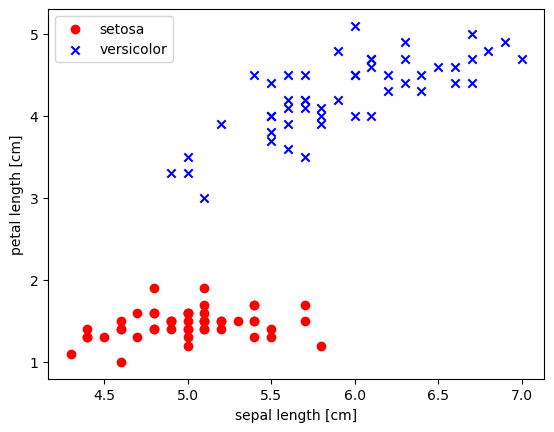

In [7]:
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [8]:
from perceptron import Perceptron

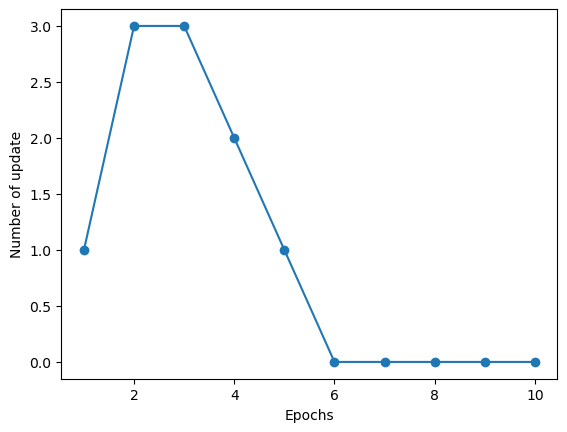

In [9]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of update')

plt.show()

In [10]:
from perceptron import plot_decision_regions

C:\Users\alser\PycharmProjects\PythonMachineLearning\Chapter2\perceptron.py:90: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


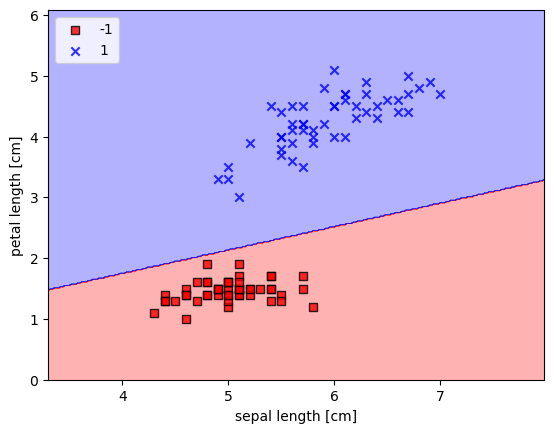

In [11]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

In [12]:
## Adalineの学習率によるコストの差を検証
from adaline import AdalineGD

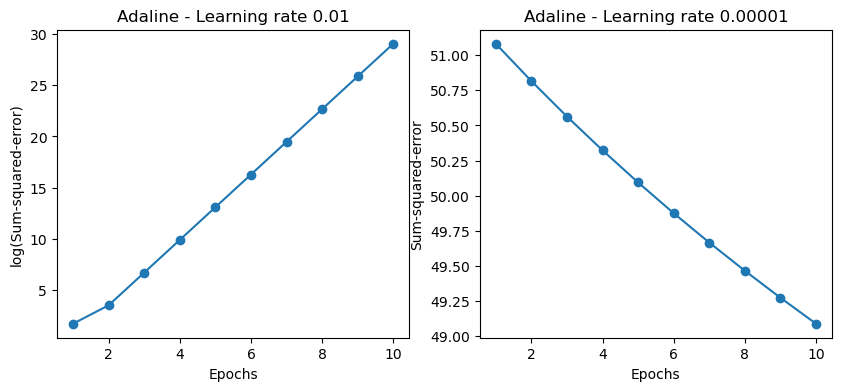

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# 勾配降下法によるADALINEの学習（学習率=0.01）
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1,len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

# 勾配降下法によるADALINEの学習（学習率=0.00001）
ada2 = AdalineGD(n_iter=10, eta=0.00001).fit(X, y)
ax[1].plot(range(1,len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.00001')

plt.show()

In [14]:
## 訓練データの標準化

# データのコピー
X_std = np.copy(X)
# 各列の標準化
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

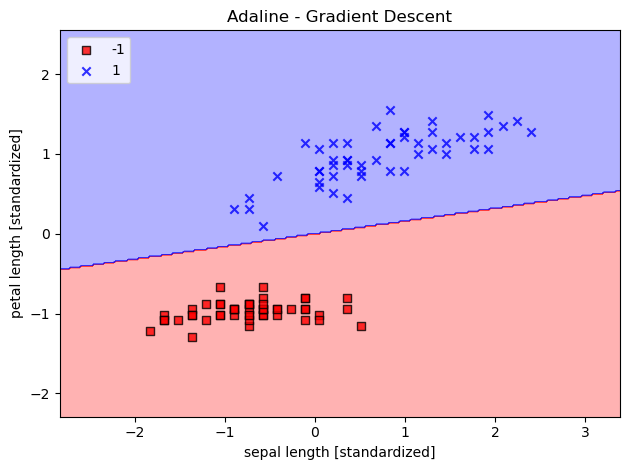

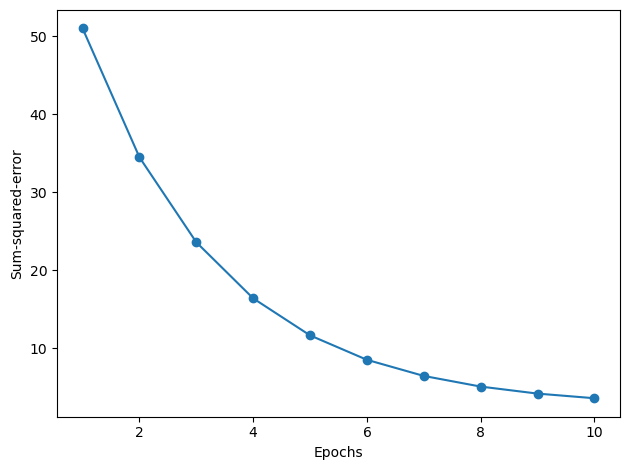

In [15]:
# 勾配降下法によるADALINEの学習（標準化後、学習率=0.01）
ada_gd = AdalineGD(n_iter=10, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

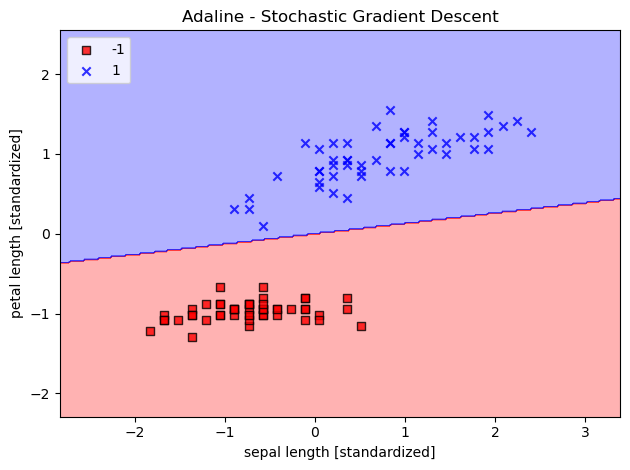

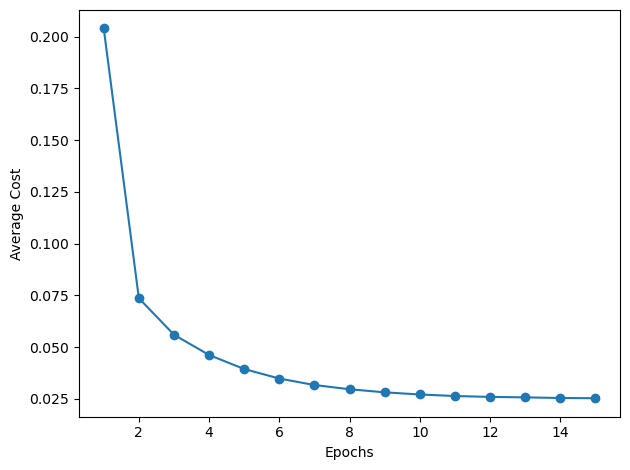

In [16]:
# 確率的勾配降下法によるADALINEの学習
from adaline import AdalineSGD
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')

plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

# エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()